In [2]:
import pandas as pd
import numpy as np
import re

# === 1. Project data ===
projects = {
    2123183: "CONSTRUCCION DEL SISTEMA DE RIEGO EN EL SECTOR DE PAMPAÑAPATA DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2305507: "INSTALACION DEL SISTEMA DE RIEGO EN LAS COMUNIDADES DE PUNAPAMPA, OCRABAMBA Y CCACCAHUASI DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2327141: "CREACION DEL SISTEMA DE RIEGO EN LA COMUNIDAD DE CHUROC DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2332993: "MEJORAMIENTO DEL SERVICIO DE APOYO A LA CADENA PRODUCTIVA DE CUYES EN LAS COMUNIDADES DE LOS DISTRITOS DE TAMBOBAMBA, COTABAMBAS, COYLLURQUI Y HAQUIRA DE LA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2335111: "CREACION DEL SISTEMA DE RIEGO EN LA COMUNIDAD DE TOTORHUAYLAS DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2344760: "MEJORAMIENTO Y AMPLIACION DEL SISTEMA DE RIEGO POR ASPERSION EN EL ANEXO DE CHULLUPATA DE LA COMUNIDAD DE SAN ANDRES DE YANACCA DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2390082: "CREACION DEL SERVICIO DE APOYO A LA CADENA PRODUCTIVA DE OVINOS EN LAS COMUNIDADES DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418981: "CREACION DEL SERVICIO DE AGUA A NIVEL PARCELARIO DEL SISTEMA DE RIEGO TECNIFICADO DE LA COMUNIDAD DE ANTUYO - DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418988: "CREACION DEL SERVICIO DE AGUA PARA RIEGO POR ASPERSION EN EL ANEXO DE RACCATI DEL CENTRO POBLADO DE CHACCARO DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418998: "CREACION DEL SERVICIO DE AGUA PARA RIEGO POR ASPERSION EN LA COMUNIDAD CAMPESINA YANACCA DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2449330: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES DE LA ASOCIACION AGROPECUARIA IKWA PAMPA DE LA COMUNIDAD PARARANI DEL DISTRITO DE CHALLHUAHUACHO PROVINCIA DE COTABAMBAS REGION APURIMAC",
    2449331: "MEJORAMIENTO DE LA PRODUCCION DE LA PAPA NATIVA DE LA ASOCIACION AGROPECUARIA QQUEULLABAMBA DEL DISTRITO DE CHALLHUAHUACHO, PROVINCIA DE COTABAMBAS, REGION APURIMAC.",
    2449332: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUY DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS AGENTA , UBICADO EN EL DISTRITO DE TAMBOBAMBA , PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449333: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS JUVENTUD DE CHULLUPATA DISTRITO TAMBOBAMBA, PROVINCIA COTABAMBAS, REGION APURIMAC",
    2449334: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES EN LA LOCALIDAD DE ANTUYO DISTRITO DE TAMBOBAMBA PROVINCIA DE COTABAMBAS REGION DE APURIMAC",
    2449335: "FORTALECIMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE PAPA NATIVA DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS MULTISERVICIOS DE PICHACA, DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC.",
    2449336: "FORTALECIMIENTO DE LA PRODUCCION Y MEJORAMIENTO DE LA COMERCIALIZACION DE MIEL, POLEN Y PROPOLEO DE LA ASOCIACION PROVINCIAL DE APICULTORES COTABAMBAS, PROVINCIA COTABAMBAS, REGION APURIMAC",
    2449338: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES EN LA LOCALIDAD DE CHOQUECCA, DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449339: "INCREMENTO DE LA COMERCIALIZACION Y PRODUCCION DE CARNE DE CUYES DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS MOSOC TIKARY DE AYACCASI, DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449340: "MEJORAMIENTO DE LA PRODUCCION Y PRODUCTIVIDAD DE CUY EN LA COMUNIDAD SAN JUAN, DISTRITO DE COTABAMBAS, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    3000384: "AREAS FORESTALES RECUPERADAS QUE CUENTEN CON UN ADECUADO MANEJO FOSRESTAL Y DE FAUNA SILVESTRE",
    3000523: "PRODUCTOR PECUARIO CON MENOR PRESENCIA DE ENFERMEDADES EN SUS ANIMALES POR EL CONTROL SANITARIO"
}

# === 2. Extract district name ===
def extract_district(text):
    m = re.search(r"DISTRITO(?:S)? DE ([A-ZÑÁÉÍÓÚ ]+)", text, re.IGNORECASE)
    return m.group(1).strip().lower() if m else None

districts = {pid: extract_district(desc) for pid, desc in projects.items()}

# === 3. Create adjacency matrix ===
ids = list(projects.keys())
n = len(ids)
adj_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(n):
        if i != j and districts[ids[i]] and districts[ids[i]] == districts[ids[j]]:
            adj_matrix[i, j] = 1

# === 4. Convert to DataFrame and display ===
df_adj = pd.DataFrame(adj_matrix, index=ids, columns=ids)

print("\nDistrict mapping:\n")
print(pd.Series(districts))

print("\nAdjacency Matrix:\n")
print(df_adj.to_string())



District mapping:

2123183                                           tambobamba
2305507                                           tambobamba
2327141                                           tambobamba
2332993                                           tambobamba
2335111                                           tambobamba
2344760                                           tambobamba
2390082                                           tambobamba
2418981                                           tambobamba
2418988                                           tambobamba
2418998                                           tambobamba
2449330    challhuahuacho provincia de cotabambas region ...
2449331                                       challhuahuacho
2449332                                           tambobamba
2449333                                                 None
2449334    tambobamba provincia de cotabambas region de a...
2449335                                           tambobamba
2449


District mapping:

2123183                                           tambobamba
2305507                                           tambobamba
2327141                                           tambobamba
2332993                                           tambobamba
2335111                                           tambobamba
2344760                                           tambobamba
2390082                                           tambobamba
2418981                                           tambobamba
2418988                                           tambobamba
2418998                                           tambobamba
2449330    challhuahuacho provincia de cotabambas region ...
2449331                                       challhuahuacho
2449332                                           tambobamba
2449333                                                 None
2449334    tambobamba provincia de cotabambas region de a...
2449335                                           tambobamba
2449

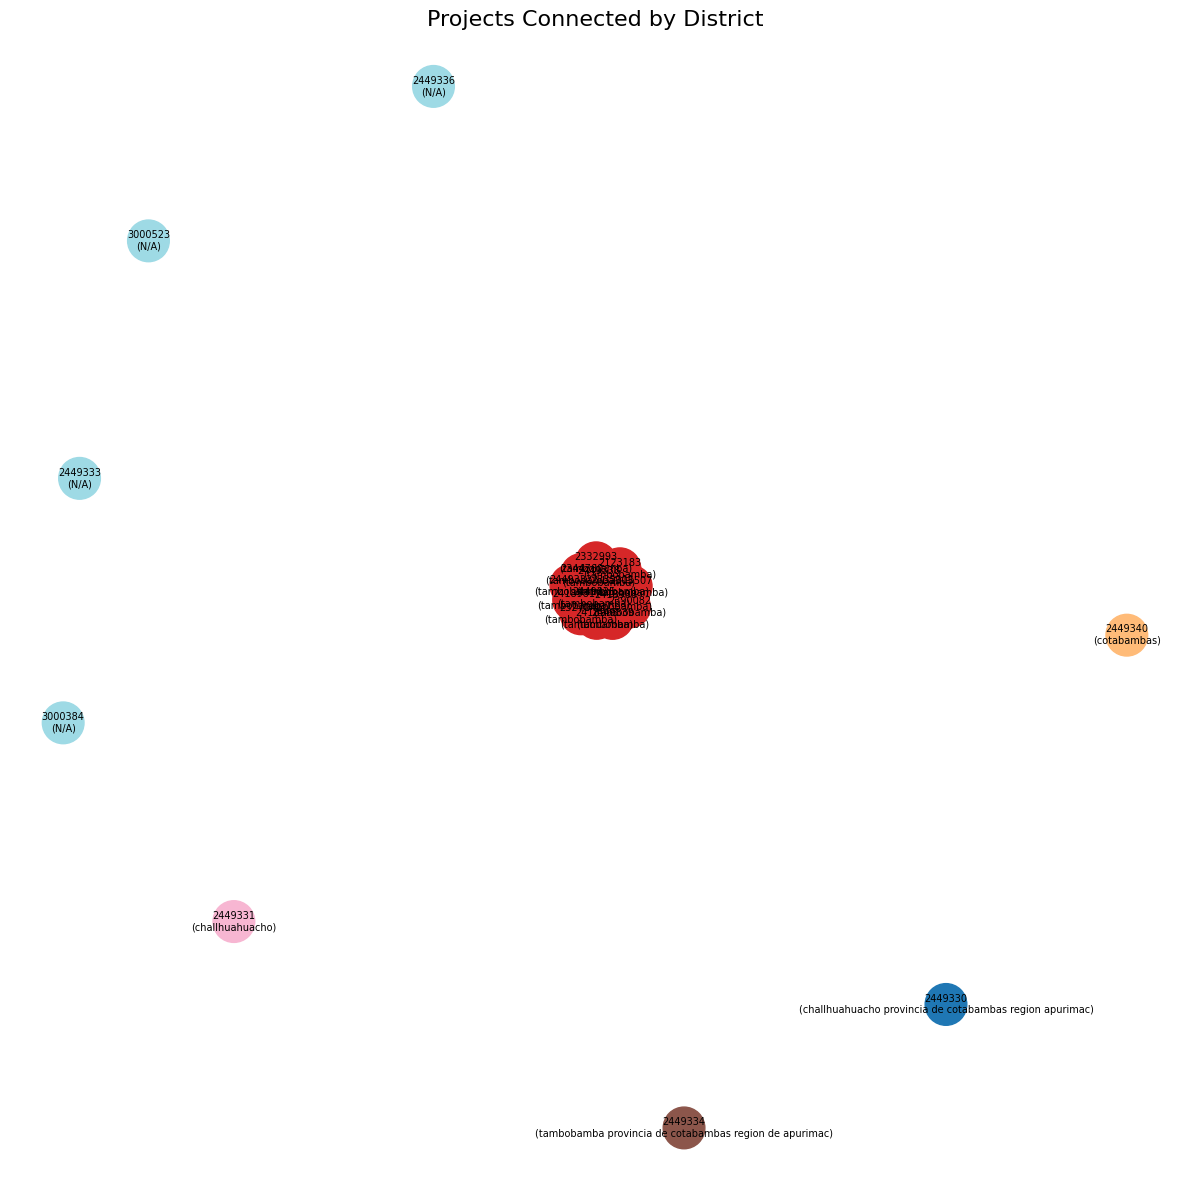

In [3]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

# === 1. Project data ===
projects = {
    2123183: "CONSTRUCCION DEL SISTEMA DE RIEGO EN EL SECTOR DE PAMPAÑAPATA DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2305507: "INSTALACION DEL SISTEMA DE RIEGO EN LAS COMUNIDADES DE PUNAPAMPA, OCRABAMBA Y CCACCAHUASI DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2327141: "CREACION DEL SISTEMA DE RIEGO EN LA COMUNIDAD DE CHUROC DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2332993: "MEJORAMIENTO DEL SERVICIO DE APOYO A LA CADENA PRODUCTIVA DE CUYES EN LAS COMUNIDADES DE LOS DISTRITOS DE TAMBOBAMBA, COTABAMBAS, COYLLURQUI Y HAQUIRA DE LA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2335111: "CREACION DEL SISTEMA DE RIEGO EN LA COMUNIDAD DE TOTORHUAYLAS DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2344760: "MEJORAMIENTO Y AMPLIACION DEL SISTEMA DE RIEGO POR ASPERSION EN EL ANEXO DE CHULLUPATA DE LA COMUNIDAD DE SAN ANDRES DE YANACCA DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2390082: "CREACION DEL SERVICIO DE APOYO A LA CADENA PRODUCTIVA DE OVINOS EN LAS COMUNIDADES DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418981: "CREACION DEL SERVICIO DE AGUA A NIVEL PARCELARIO DEL SISTEMA DE RIEGO TECNIFICADO DE LA COMUNIDAD DE ANTUYO - DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418988: "CREACION DEL SERVICIO DE AGUA PARA RIEGO POR ASPERSION EN EL ANEXO DE RACCATI DEL CENTRO POBLADO DE CHACCARO DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418998: "CREACION DEL SERVICIO DE AGUA PARA RIEGO POR ASPERSION EN LA COMUNIDAD CAMPESINA YANACCA DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2449330: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES DE LA ASOCIACION AGROPECUARIA IKWA PAMPA DE LA COMUNIDAD PARARANI DEL DISTRITO DE CHALLHUAHUACHO PROVINCIA DE COTABAMBAS REGION APURIMAC",
    2449331: "MEJORAMIENTO DE LA PRODUCCION DE LA PAPA NATIVA DE LA ASOCIACION AGROPECUARIA QQUEULLABAMBA DEL DISTRITO DE CHALLHUAHUACHO, PROVINCIA DE COTABAMBAS, REGION APURIMAC.",
    2449332: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUY DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS AGENTA , UBICADO EN EL DISTRITO DE TAMBOBAMBA , PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449333: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS JUVENTUD DE CHULLUPATA DISTRITO TAMBOBAMBA, PROVINCIA COTABAMBAS, REGION APURIMAC",
    2449334: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES EN LA LOCALIDAD DE ANTUYO DISTRITO DE TAMBOBAMBA PROVINCIA DE COTABAMBAS REGION DE APURIMAC",
    2449335: "FORTALECIMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE PAPA NATIVA DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS MULTISERVICIOS DE PICHACA, DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC.",
    2449336: "FORTALECIMIENTO DE LA PRODUCCION Y MEJORAMIENTO DE LA COMERCIALIZACION DE MIEL, POLEN Y PROPOLEO DE LA ASOCIACION PROVINCIAL DE APICULTORES COTABAMBAS, PROVINCIA COTABAMBAS, REGION APURIMAC",
    2449338: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES EN LA LOCALIDAD DE CHOQUECCA, DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449339: "INCREMENTO DE LA COMERCIALIZACION Y PRODUCCION DE CARNE DE CUYES DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS MOSOC TIKARY DE AYACCASI, DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449340: "MEJORAMIENTO DE LA PRODUCCION Y PRODUCTIVIDAD DE CUY EN LA COMUNIDAD SAN JUAN, DISTRITO DE COTABAMBAS, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    3000384: "AREAS FORESTALES RECUPERADAS QUE CUENTEN CON UN ADECUADO MANEJO FOSRESTAL Y DE FAUNA SILVESTRE",
    3000523: "PRODUCTOR PECUARIO CON MENOR PRESENCIA DE ENFERMEDADES EN SUS ANIMALES POR EL CONTROL SANITARIO"
}

# === 2. Extract district name ===
def extract_district(text):
    m = re.search(r"DISTRITO(?:S)? DE ([A-ZÑÁÉÍÓÚ ]+)", text, re.IGNORECASE)
    return m.group(1).strip().lower() if m else None

districts = {pid: extract_district(desc) for pid, desc in projects.items()}

# === 3. Create adjacency matrix ===
ids = list(projects.keys())
n = len(ids)
adj_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(n):
        if i != j and districts[ids[i]] and districts[ids[i]] == districts[ids[j]]:
            adj_matrix[i, j] = 1

df_adj = pd.DataFrame(adj_matrix, index=ids, columns=ids)

# === 4. Print results ===
print("\nDistrict mapping:\n")
print(pd.Series(districts))

print("\nAdjacency Matrix:\n")
print(df_adj.to_string())

# === 5. Create a NetworkX graph from the adjacency matrix ===
G = nx.from_pandas_adjacency(df_adj)

# Add district as node attribute
for pid in G.nodes():
    G.nodes[pid]['district'] = districts[pid]

# === 6. Draw the graph ===
plt.figure(figsize=(12, 12))
pos = nx.spring_layout(G, seed=42)  # positions for all nodes

# Assign a unique color per district
unique_districts = {d: i for i, d in enumerate(set(d for d in districts.values() if d))}
colors = []
for node in G.nodes():
    dist = districts[node]
    if dist:
        colors.append(unique_districts[dist])
    else:
        colors.append(len(unique_districts) + 1)  # gray for unknown

# Node labels: "ProjectID\n(District)"
labels = {node: f"{node}\n({districts[node] if districts[node] else 'N/A'})" for node in G.nodes()}

nx.draw_networkx_nodes(G, pos, node_color=colors, cmap=plt.cm.tab20, node_size=900)
nx.draw_networkx_edges(G, pos, alpha=0.3)
nx.draw_networkx_labels(G, pos, labels, font_size=7)

plt.title("Projects Connected by District", fontsize=16)
plt.axis('off')
plt.tight_layout()
plt.show()


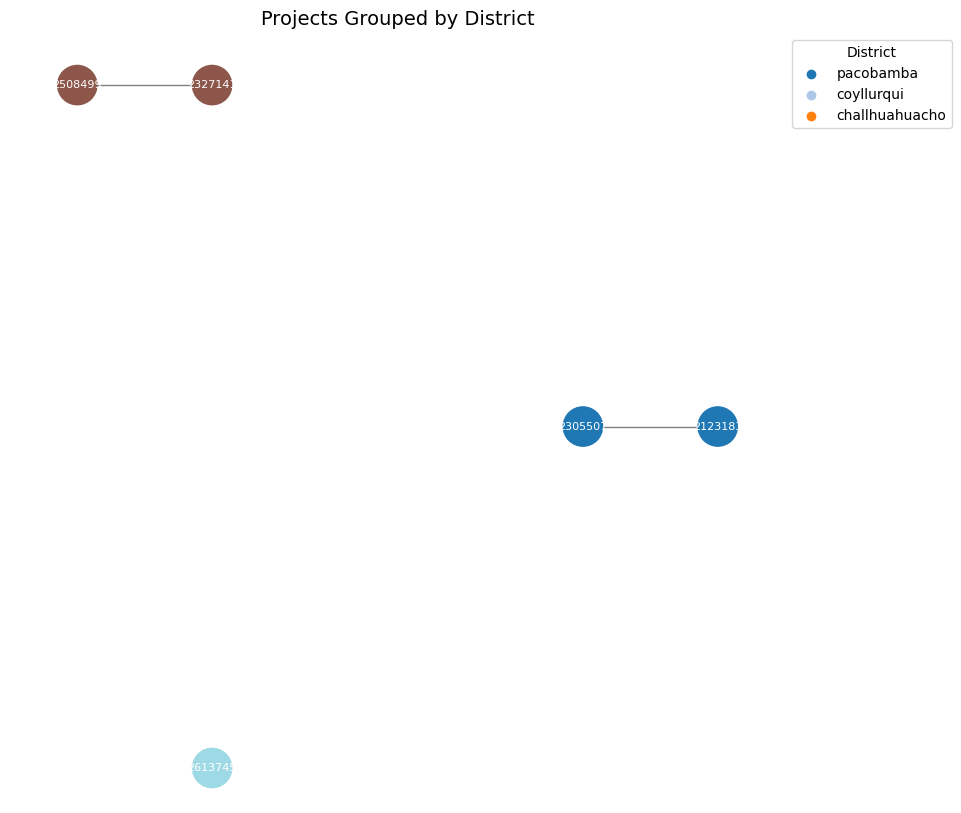

In [4]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

# === 1. Project data ===
projects = {
    "2123183": "MEJORAMIENTO Y AMPLIACIÓN DE LOS SERVICIOS DE EDUCACIÓN INICIAL ESCOLARIZADA EN EL (LA) I.E.I. N° 403-24 DEL CENTRO POBLADO DE HUANCHUY DEL DISTRITO DE PACOBAMBA, PROVINCIA DE ANDAHUAYLAS, DEPARTAMENTO DE APURIMAC. DISTRITO DE PACOBAMBA",
    "2305507": "INSTALACIÓN DEL SERVICIO DE AGUA POTABLE Y SANEAMIENTO EN LA COMUNIDAD DE QUISHUAR DEL DISTRITO DE PACOBAMBA, PROVINCIA DE ANDAHUAYLAS, DEPARTAMENTO DE APURIMAC. DISTRITO DE PACOBAMBA",
    "2327141": "MEJORAMIENTO DEL SERVICIO EDUCATIVO DE LA I.E. N° 50438 DEL CENTRO POBLADO DE SAN PEDRO DEL DISTRITO DE COYLLURQUI, PROVINCIA DE COTABAMBAS, DEPARTAMENTO DE APURIMAC. DISTRITO DE COYLLURQUI",
    "2508499": "MEJORAMIENTO Y AMPLIACIÓN DE LOS SERVICIOS DE AGUA POTABLE Y SANEAMIENTO EN LA LOCALIDAD DE SAN PEDRO DEL DISTRITO DE COYLLURQUI, PROVINCIA DE COTABAMBAS, DEPARTAMENTO DE APURIMAC. DISTRITO DE COYLLURQUI",
    "2613745": "CREACIÓN DEL SERVICIO DE TRANSITABILIDAD VEHICULAR EN LA LOCALIDAD DE NUEVA ESPERANZA DEL DISTRITO DE CHALLHUAHUACHO, PROVINCIA DE COTABAMBAS, DEPARTAMENTO DE APURIMAC. DISTRITO DE CHALLHUAHUACHO",
}

# === 2. Extract district name ===
def extract_district(text):
    m = re.search(r"DISTRITO(?:S)? DE ([A-ZÑÁÉÍÓÚ ]+)", text, re.IGNORECASE)
    return m.group(1).strip().lower() if m else None

districts = {pid: extract_district(desc) for pid, desc in projects.items()}

# === 3. Create adjacency matrix ===
ids = list(projects.keys())
n = len(ids)
adj_matrix = np.zeros((n, n), dtype=int)

for i in range(n):
    for j in range(n):
        if i != j and districts[ids[i]] and districts[ids[i]] == districts[ids[j]]:
            adj_matrix[i, j] = 1

df_adj = pd.DataFrame(adj_matrix, index=ids, columns=ids)

# === 4. Create NetworkX graph ===
G = nx.from_pandas_adjacency(df_adj)
for pid in G.nodes():
    G.nodes[pid]['district'] = districts[pid]

# === 5. Clustered layout ===
# Get unique districts and group nodes
district_groups = {}
for node, dist in districts.items():
    district_groups.setdefault(dist, []).append(node)

pos = {}
radius_outer = 5  # distance between district clusters
radius_inner = 1  # distance between nodes in same district

# Place each district in a big circle
num_districts = len(district_groups)
for i, (dist, nodes) in enumerate(district_groups.items()):
    # Position of the district center
    angle = 2 * np.pi * i / num_districts
    center_x = radius_outer * np.cos(angle)
    center_y = radius_outer * np.sin(angle)

    # Arrange nodes of this district in a smaller circle around the center
    for j, node in enumerate(nodes):
        angle_node = 2 * np.pi * j / len(nodes)
        pos[node] = (
            center_x + radius_inner * np.cos(angle_node),
            center_y + radius_inner * np.sin(angle_node)
        )

# === 6. Color mapping per district ===
unique_districts = list(district_groups.keys())
color_map = {dist: idx for idx, dist in enumerate(unique_districts)}
node_colors = [color_map[districts[node]] for node in G.nodes()]

# === 7. Draw graph ===
plt.figure(figsize=(10, 10))
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=plt.cm.tab20, node_size=800)
nx.draw_networkx_edges(G, pos, alpha=0.5)
nx.draw_networkx_labels(G, pos, font_size=8, font_color="white")

# Legend
for dist, idx in color_map.items():
    plt.scatter([], [], c=[plt.cm.tab20(idx)], label=dist)
plt.legend(title="District", loc="upper left", bbox_to_anchor=(1, 1))

plt.title("Projects Grouped by District", fontsize=14)
plt.axis('off')
plt.show()


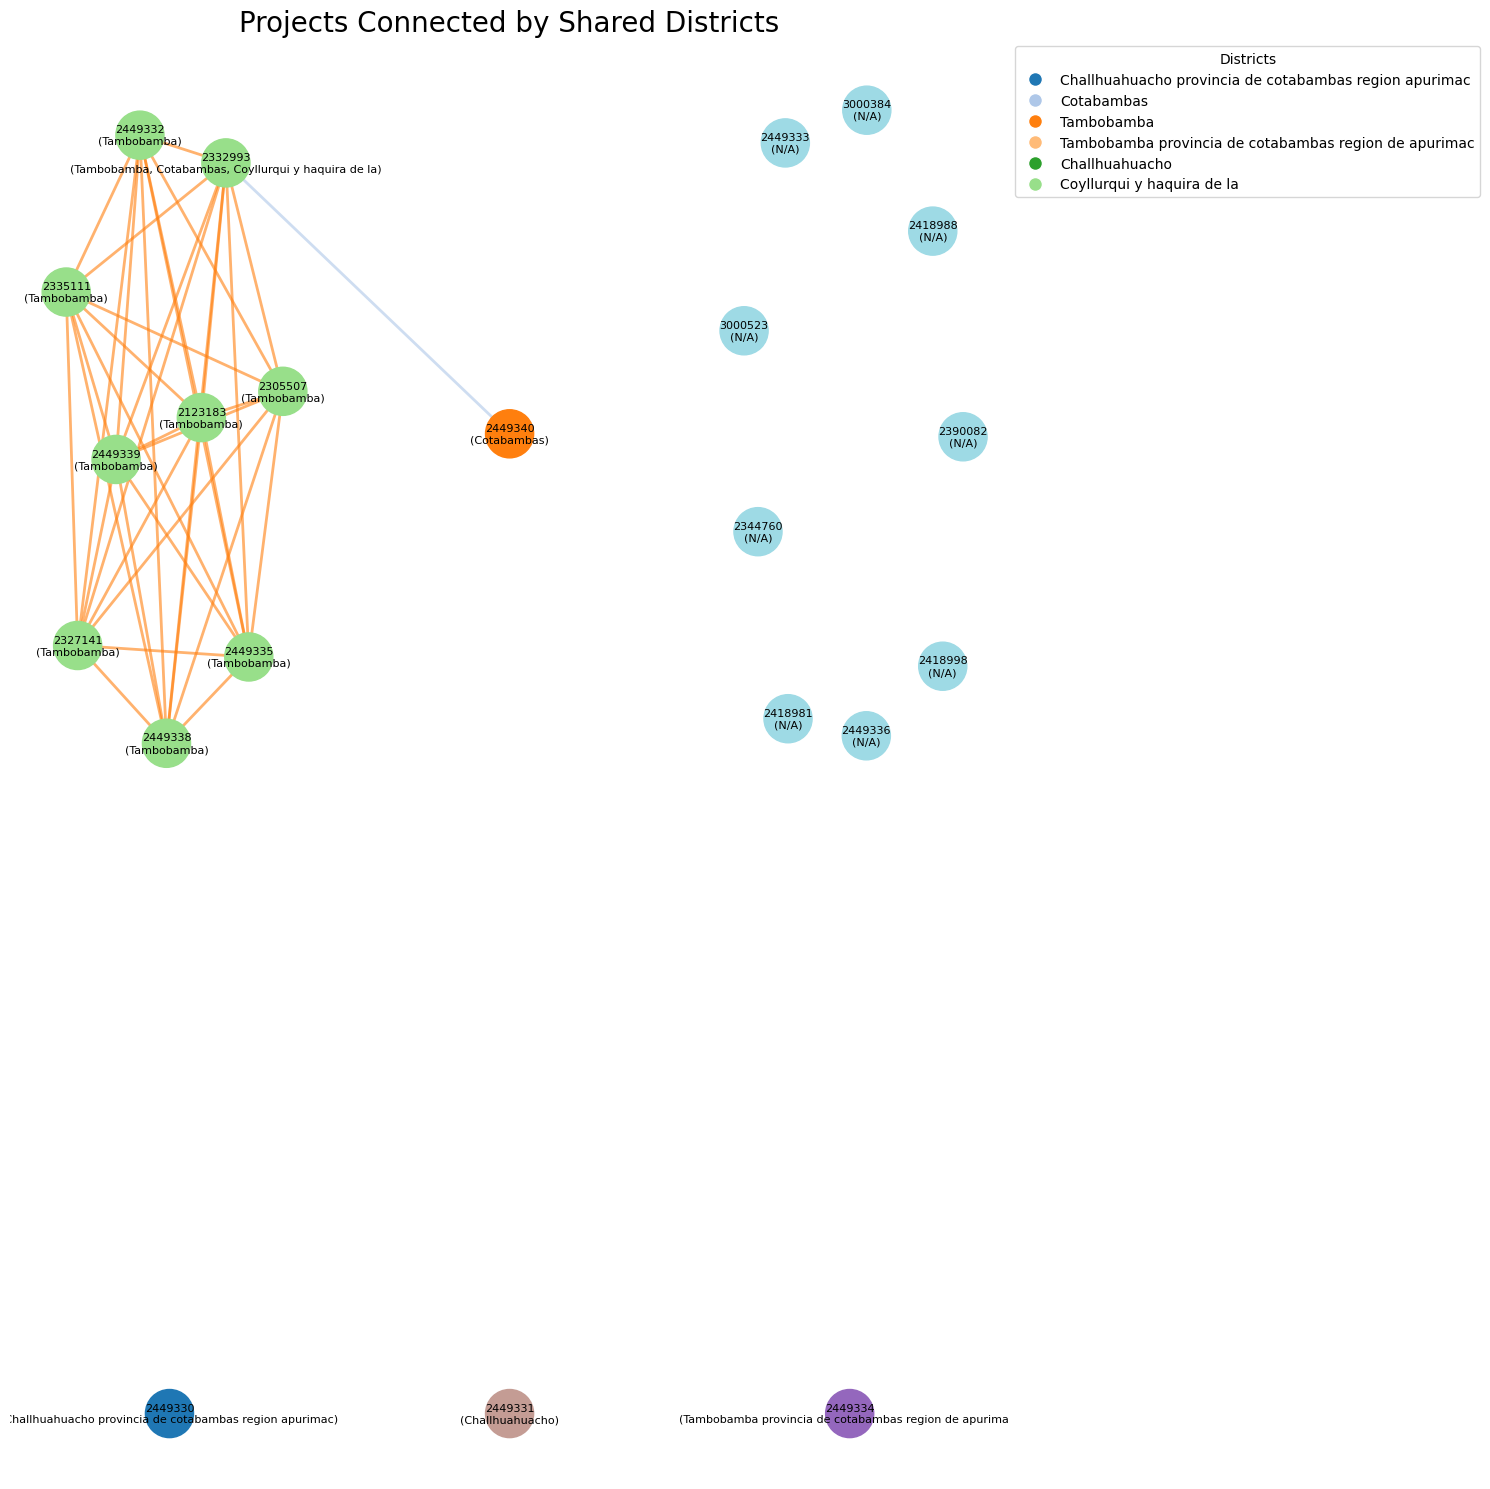

In [11]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt

# === 1. Project data ===
projects = {
    2123183: "CONSTRUCCION DEL SISTEMA DE RIEGO EN EL SECTOR DE PAMPAÑAPATA DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2305507: "INSTALACION DEL SISTEMA DE RIEGO EN LAS COMUNIDADES DE PUNAPAMPA, OCRABAMBA Y CCACCAHUASI DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2327141: "CREACION DEL SISTEMA DE RIEGO EN LA COMUNIDAD DE CHUROC DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2332993: "MEJORAMIENTO DEL SERVICIO DE APOYO A LA CADENA PRODUCTIVA DE CUYES EN LAS COMUNIDADES DE LOS DISTRITOS DE TAMBOBAMBA, COTABAMBAS, COYLLURQUI Y HAQUIRA DE LA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2335111: "CREACION DEL SISTEMA DE RIEGO EN LA COMUNIDAD DE TOTORHUAYLAS DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS - APURIMAC",
    2344760: "MEJORAMIENTO Y AMPLIACION DEL SISTEMA DE RIEGO POR ASPERSION EN EL ANEXO DE CHULLUPATA DE LA COMUNIDAD DE SAN ANDRES DE YANACCA DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2390082: "CREACION DEL SERVICIO DE APOYO A LA CADENA PRODUCTIVA DE OVINOS EN LAS COMUNIDADES DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418981: "CREACION DEL SERVICIO DE AGUA A NIVEL PARCELARIO DEL SISTEMA DE RIEGO TECNIFICADO DE LA COMUNIDAD DE ANTUYO - DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418988: "CREACION DEL SERVICIO DE AGUA PARA RIEGO POR ASPERSION EN EL ANEXO DE RACCATI DEL CENTRO POBLADO DE CHACCARO DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2418998: "CREACION DEL SERVICIO DE AGUA PARA RIEGO POR ASPERSION EN LA COMUNIDAD CAMPESINA YANACCA DEL DISTRITO DE TAMBOBAMBA - PROVINCIA DE COTABAMBAS - DEPARTAMENTO DE APURIMAC",
    2449330: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES DE LA ASOCIACION AGROPECUARIA IKWA PAMPA DE LA COMUNIDAD PARARANI DEL DISTRITO DE CHALLHUAHUACHO PROVINCIA DE COTABAMBAS REGION APURIMAC",
    2449331: "MEJORAMIENTO DE LA PRODUCCION DE LA PAPA NATIVA DE LA ASOCIACION AGROPECUARIA QQUEULLABAMBA DEL DISTRITO DE CHALLHUAHUACHO, PROVINCIA DE COTABAMBAS, REGION APURIMAC.",
    2449332: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUY DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS AGENTA , UBICADO EN EL DISTRITO DE TAMBOBAMBA , PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449333: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS JUVENTUD DE CHULLUPATA DISTRITO TAMBOBAMBA, PROVINCIA COTABAMBAS, REGION APURIMAC",
    2449334: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES EN LA LOCALIDAD DE ANTUYO DISTRITO DE TAMBOBAMBA PROVINCIA DE COTABAMBAS REGION DE APURIMAC",
    2449335: "FORTALECIMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE PAPA NATIVA DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS MULTISERVICIOS DE PICHACA, DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC.",
    2449336: "FORTALECIMIENTO DE LA PRODUCCION Y MEJORAMIENTO DE LA COMERCIALIZACION DE MIEL, POLEN Y PROPOLEO DE LA ASOCIACION PROVINCIAL DE APICULTORES COTABAMBAS, PROVINCIA COTABAMBAS, REGION APURIMAC",
    2449338: "MEJORAMIENTO DE LA PRODUCCION Y COMERCIALIZACION DE CUYES EN LA LOCALIDAD DE CHOQUECCA, DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449339: "INCREMENTO DE LA COMERCIALIZACION Y PRODUCCION DE CARNE DE CUYES DE LA ASOCIACION DE PRODUCTORES AGROPECUARIOS MOSOC TIKARY DE AYACCASI, DEL DISTRITO DE TAMBOBAMBA, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    2449340: "MEJORAMIENTO DE LA PRODUCCION Y PRODUCTIVIDAD DE CUY EN LA COMUNIDAD SAN JUAN, DISTRITO DE COTABAMBAS, PROVINCIA DE COTABAMBAS, REGION APURIMAC",
    3000384: "AREAS FORESTALES RECUPERADAS QUE CUENTEN CON UN ADECUADO MANEJO FOSRESTAL Y DE FAUNA SILVESTRE",
    3000523: "PRODUCTOR PECUARIO CON MENOR PRESENCIA DE ENFERMEDADES EN SUS ANIMALES POR EL CONTROL SANITARIO"
}

# === 2. Extract district names from project descriptions ===
def extract_district(text):
    # This regex is improved to handle multiple districts and single districts
    m = re.findall(r"DISTRITO(?:S)? DE ([A-ZÑÁÉÍÓÚ\s,]+?)(?:, PROVINCIA|$)", text, re.IGNORECASE)
    if m:
        # Split and clean the list of districts
        districts_list = [d.strip().lower() for d in m[0].split(',') if d.strip()]
        return districts_list
    return []

# Create a dictionary to store a list of districts for each project
districts = {pid: extract_district(desc) for pid, desc in projects.items()}

# === 3. Create adjacency list for projects with shared districts ===
adj_list = []
ids = list(projects.keys())

for i in range(len(ids)):
    for j in range(i + 1, len(ids)):
        proj_a = ids[i]
        proj_b = ids[j]
        
        # Check for shared districts
        shared_districts = set(districts[proj_a]) & set(districts[proj_b])
        if shared_districts:
            # Add an edge for each shared district, so we can color them
            for district in shared_districts:
                adj_list.append((proj_a, proj_b, {'district': district}))

# === 4. Create network graph ===
G = nx.Graph()
G.add_edges_from(adj_list)

# Add nodes that are isolated (no shared districts)
isolated_nodes = set(ids) - set(G.nodes())
G.add_nodes_from(isolated_nodes)
for node in isolated_nodes:
    G.nodes[node]['district'] = 'Unknown'

# === 5. Clustered layout by district ===
# Group nodes by their primary district
district_groups = {}
for node in G.nodes():
    # Use the first district found as the primary for positioning
    primary_district = districts[node][0] if districts[node] else 'unknown'
    district_groups.setdefault(primary_district, []).append(node)

# Position clusters in a grid for better separation
pos = {}
x_offset = 0
y_offset = 0
max_per_row = 3

for idx, (dist, nodes) in enumerate(district_groups.items()):
    # Get a subgraph for this district and calculate its layout
    subgraph = G.subgraph(nodes)
    cluster_pos = nx.spring_layout(subgraph, seed=42)
    
    # Apply the offset to position the cluster
    for node, (x, y) in cluster_pos.items():
        pos[node] = (x + x_offset, y + y_offset)

    x_offset += 3
    if (idx + 1) % max_per_row == 0:
        x_offset = 0
        y_offset -= 3

# === 6. Draw the graph with enhanced visualization ===
plt.figure(figsize=(15, 15))

# Assign a unique color per district for nodes and edges
unique_districts = {d: i for i, d in enumerate(set(k for sublist in districts.values() for k in sublist))}
node_colors = []
for node in G.nodes():
    primary_district = districts[node][0] if districts[node] else 'unknown'
    node_colors.append(unique_districts.get(primary_district, len(unique_districts) + 1))

# Draw nodes, edges, and labels
cmap = plt.cm.tab20
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=1200)

# Draw edges, colored by the shared district
for u, v, data in G.edges(data=True):
    shared_district = data['district']
    edge_color = cmap(unique_districts.get(shared_district, 0)) # Use same color map
    nx.draw_networkx_edges(G, pos, edgelist=[(u,v)], edge_color=edge_color, alpha=0.6, width=2)


# Create labels for nodes to include both ID and district
labels = {node: f"{node}\n({', '.join(d.capitalize() for d in districts[node])})" if districts[node] else f"{node}\n(N/A)" for node in G.nodes()}

nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

# Add a legend for the districts
handles = [plt.Line2D([0], [0], marker='o', color='w', markerfacecolor=cmap(unique_districts[d]), markersize=10, label=d.capitalize()) for d in unique_districts.keys()]
plt.legend(handles=handles, title="Districts", loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Projects Connected by Shared Districts", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()

Detected columns: ['Producto / Proyecto', 'PIA', 'PIM', 'Certificación', 'Compromiso Anual', 'Ejecución', 'Unnamed: 6', 'Unnamed: 7', 'Avance %']
Loaded 0 projects with Avance >= 90%


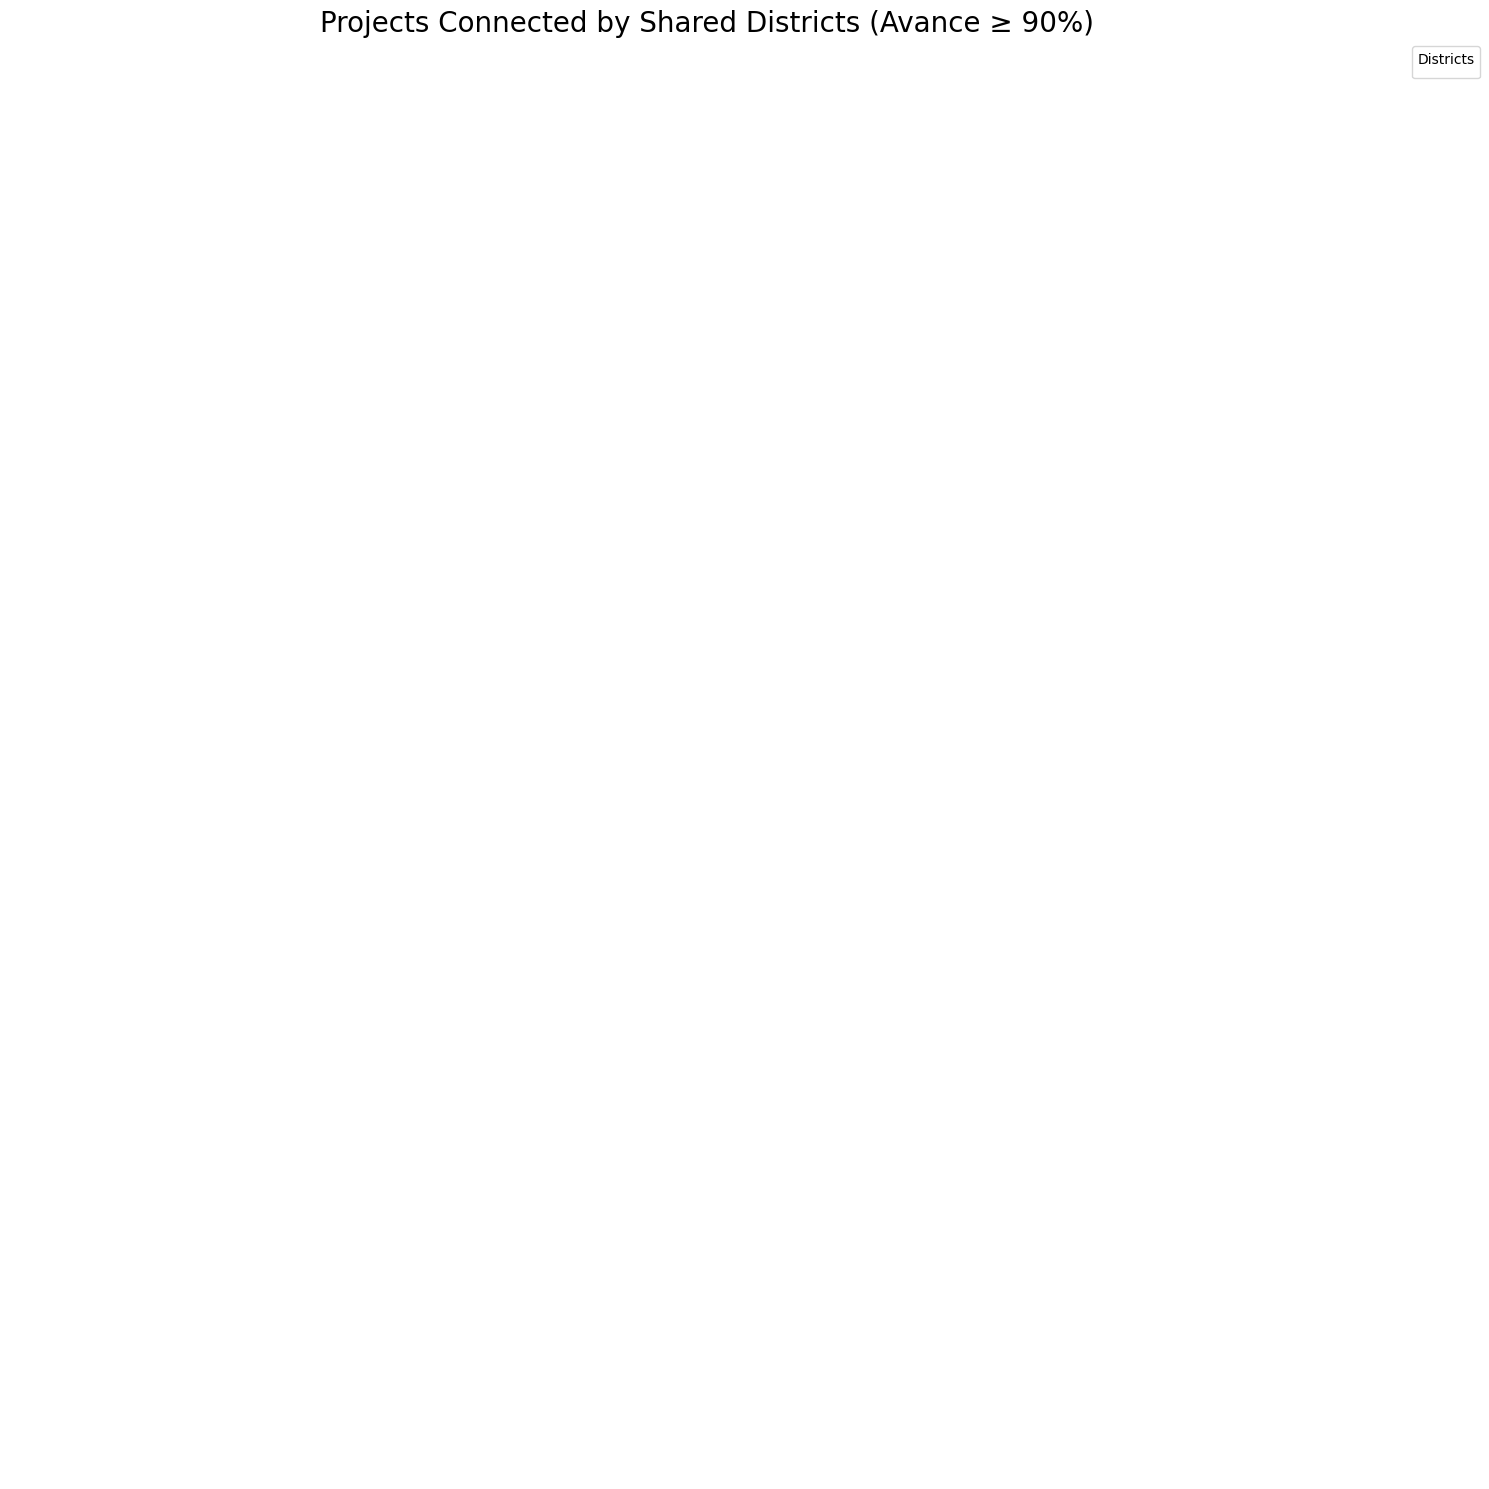

In [25]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import os

# --- Full path to your file ---
file_path = r"D:\thesis_project\spending_data\SMPCT_2019\MPCT_FUNCION_2019_agropecuario.xlsx"

# --- Check if file exists ---
if not os.path.exists(file_path):
    raise FileNotFoundError(f"File not found: {file_path}")

# --- Step 1: Read file without headers to search for the header row ---
raw_df = pd.read_excel(file_path, header=None)

# --- Step 2: Find the row containing 'Avance' and '%' ---
header_row = None
for idx, row in raw_df.iterrows():
    row_text = " ".join(row.astype(str)).lower()
    if "avance" in row_text and "%" in row_text:
        header_row = idx
        break

if header_row is None:
    raise ValueError("No header row containing 'Avance' and '%' found.")

# --- Step 3: Load the data again, using the detected header row ---
df = pd.read_excel(file_path, skiprows=header_row)

# --- Step 4: Clean column names ---
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace("\u00a0", " ", regex=False)  # Remove non-breaking spaces
)

print("Detected columns:", df.columns.tolist())

# --- Step 5: Find the correct 'Avance %' column name ---
avance_col = None
for col in df.columns:
    col_clean = col.lower().replace(" ", "")
    if "avance" in col_clean and "%" in col_clean:
        avance_col = col
        break

if avance_col is None:
    raise KeyError("No column found containing 'Avance' and '%'.")

# --- Step 6: Convert to numeric ---
df[avance_col] = pd.to_numeric(df[avance_col], errors="coerce")

# --- Step 7: Filter rows where Avance % >= 90 ---
filtered_df = df[df[avance_col] >= 90]

# --- Step 8: Use 'Producto / Proyecto' column instead of 'Actividad/Proyecto' ---
projects = {}
if 'Producto / Proyecto' not in df.columns:
    raise KeyError("Column 'Producto / Proyecto' not found in the dataset.")

for _, row in filtered_df.iterrows():
    match = re.match(r"(\d+):\s*(.*)", str(row['Producto / Proyecto']))
    if match:
        code = int(match.group(1))
        desc = match.group(2)
        projects[code] = desc

print(f"Loaded {len(projects)} projects with Avance >= 90%")

# === 2. Extract district names ===
def extract_district(text):
    if not isinstance(text, str):
        return []
    # Flexible regex to catch variations like "DISTRITO DE", "DEL DISTRITO DE", "DISTRITO TAMBOBAMBA"
    patterns = [
        r"(?:DEL\s+)?DISTRITO(?:S)?\s+DE\s+([A-ZÑÁÉÍÓÚ\s,]+?)(?:,| -|$)",
        r"(?:DEL\s+)?DISTRITO\s+([A-ZÑÁÉÍÓÚ\s,]+?)(?:,| -|$)"
    ]
    found = []
    for pat in patterns:
        matches = re.findall(pat, text.upper())
        for m in matches:
            found.extend([d.strip().lower() for d in m.split(',') if d.strip()])
    return list(set(found))  # remove duplicates

districts = {pid: extract_district(desc) for pid, desc in projects.items()}

# === 3. Create adjacency list ===
adj_list = []
ids = list(projects.keys())

for i in range(len(ids)):
    for j in range(i + 1, len(ids)):
        shared_districts = set(districts[ids[i]]) & set(districts[ids[j]])
        for district in shared_districts:
            adj_list.append((ids[i], ids[j], {'district': district}))

# === 4. Create graph ===
G = nx.Graph()
G.add_edges_from(adj_list)
isolated_nodes = set(ids) - set(G.nodes())
G.add_nodes_from(isolated_nodes)

# === 5. Clustered layout ===
district_groups = {}
for node in G.nodes():
    primary_district = districts[node][0] if districts[node] else 'unknown'
    district_groups.setdefault(primary_district, []).append(node)

pos = {}
x_offset = 0
y_offset = 0
max_per_row = 3

for idx, (dist, nodes) in enumerate(district_groups.items()):
    subgraph = G.subgraph(nodes)
    cluster_pos = nx.spring_layout(subgraph, seed=42)
    for node, (x, y) in cluster_pos.items():
        pos[node] = (x + x_offset, y + y_offset)
    x_offset += 3
    if (idx + 1) % max_per_row == 0:
        x_offset = 0
        y_offset -= 3

# === 6. Draw the graph ===
plt.figure(figsize=(15, 15))
unique_districts = {d: i for i, d in enumerate(set(k for sublist in districts.values() for k in sublist))}
node_colors = []
for node in G.nodes():
    primary_district = districts[node][0] if districts[node] else 'unknown'
    node_colors.append(unique_districts.get(primary_district, len(unique_districts) + 1))

cmap = plt.cm.tab20
nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=1200)

for u, v, data in G.edges(data=True):
    shared_district = data['district']
    edge_color = cmap(unique_districts.get(shared_district, 0))
    nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, alpha=0.6, width=2)

labels = {
    node: f"{node}\n({', '.join(d.capitalize() for d in districts[node])})" if districts[node] else f"{node}\n(N/A)"
    for node in G.nodes()
}
nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

handles = [
    plt.Line2D([0], [0], marker='o', color='w',
               markerfacecolor=cmap(unique_districts[d]), markersize=10, label=d.capitalize())
    for d in unique_districts.keys()
]
plt.legend(handles=handles, title="Districts", loc='upper left', bbox_to_anchor=(1, 1))

plt.title("Projects Connected by Shared Districts (Avance ≥ 90%)", fontsize=20)
plt.axis('off')
plt.tight_layout()
plt.show()



In [ ]:
import pandas as pd
import numpy as np
import re
import networkx as nx
import matplotlib.pyplot as plt
import os

# The file path is set to the name of the file you uploaded.
file_path = "MPCT_FUNCION_2019_agropecuario.xlsx - 28920661.csv"

# --- Step 1: Read file without headers to search for the header row ---
# We use a try-except block to gracefully handle cases where the file might not be found.
try:
    raw_df = pd.read_csv(file_path, header=None, encoding='latin1')
except FileNotFoundError:
    print(f"Error: File not found at '{file_path}'. Please ensure the file is in the correct directory.")
    exit()

# --- Step 2: Find the row containing 'Avance' and '%' ---
# This loop iterates through the first few rows to find the actual header.
header_row = None
for idx, row in raw_df.iterrows():
    # Fill NaN values with an empty string before joining and converting to lower case.
    row_text = " ".join(row.fillna('').astype(str)).lower()
    if "avance" in row_text and "%" in row_text:
        header_row = idx
        break

if header_row is None:
    print("Error: No header row containing 'Avance' and '%' was found in the file.")
    exit()

# --- Step 3: Load the data again, using the detected header row ---
df = pd.read_csv(file_path, skiprows=header_row, encoding='latin1')

# --- Step 4: Clean column names ---
df.columns = (
    df.columns.astype(str)
    .str.strip()
    .str.replace("\u00a0", " ", regex=False)  # Remove non-breaking spaces
)

print("Detected columns:", df.columns.tolist())

# --- Step 5: Find the correct 'Avance %' column name ---
avance_col = None
for col in df.columns:
    # A more robust check to find the 'Avance %' column name.
    col_clean = col.lower().replace(" ", "")
    if "avance" in col_clean and "%" in col_clean:
        avance_col = col
        break

if avance_col is None:
    print("Error: No column found containing 'Avance' and '%'.")
    exit()

# --- Step 6: Convert 'Avance %' to numeric with a more robust cleaning step ---
# This is the key correction. We first convert the column to string, then use a regex
# to remove any character that is not a digit or a decimal point, then convert to numeric.
df[avance_col] = df[avance_col].astype(str).str.strip().str.replace('[^\d.]', '', regex=True)
df[avance_col] = pd.to_numeric(df[avance_col], errors="coerce")

# --- Step 7: Filter rows where Avance % >= 90 ---
# The first column is unnamed, which contains the project descriptions.
# We also drop rows where the project description is missing.
projects_col = df.columns[0]
filtered_df = df[df[avance_col] >= 90].dropna(subset=[projects_col]).copy()

# --- Step 8: Extract project codes and descriptions ---
projects = {}
for _, row in filtered_df.iterrows():
    match = re.match(r"(\d+):\s*(.*)", str(row[projects_col]))
    if match:
        code = int(match.group(1))
        desc = match.group(2)
        projects[code] = desc

print(f"Loaded {len(projects)} projects with Avance >= 90%")

# --- Check if any projects were found ---
if len(projects) == 0:
    print("No projects found with Avance >= 90% after filtering. The graph cannot be generated.")
else:
    # === 2. Extract district names ===
    def extract_district(text):
        if not isinstance(text, str):
            return []
        # Flexible regex to catch variations like "DISTRITO DE", "DEL DISTRITO DE", etc.
        patterns = [
            r"(?:DEL\s+)?DISTRITO(?:S)?\s+DE\s+([A-ZÑÁÉÍÓÚ\s,]+?)(?:,| -|$)",
            r"(?:DEL\s+)?DISTRITO\s+([A-ZÑÁÉÍÓÚ\s,]+?)(?:,| -|$)"
        ]
        found = []
        for pat in patterns:
            matches = re.findall(pat, text.upper())
            for m in matches:
                # Split by comma to handle multiple districts and clean whitespace.
                found.extend([d.strip().lower() for d in m.split(',') if d.strip()])
        return list(set(found))  # Remove duplicates

    districts = {pid: extract_district(desc) for pid, desc in projects.items()}

    # === 3. Create adjacency list ===
    adj_list = []
    ids = list(projects.keys())

    for i in range(len(ids)):
        for j in range(i + 1, len(ids)):
            shared_districts = set(districts[ids[i]]) & set(districts[ids[j]])
            for district in shared_districts:
                adj_list.append((ids[i], ids[j], {'district': district}))

    # === 4. Create graph ===
    G = nx.Graph()
    G.add_edges_from(adj_list)
    isolated_nodes = set(ids) - set(G.nodes())
    G.add_nodes_from(isolated_nodes)

    # === 5. Clustered layout ===
    district_groups = {}
    for node in G.nodes():
        primary_district = districts.get(node, ['unknown'])[0]
        district_groups.setdefault(primary_district, []).append(node)

    pos = {}
    x_offset = 0
    y_offset = 0
    max_per_row = 3

    for idx, (dist, nodes) in enumerate(district_groups.items()):
        subgraph = G.subgraph(nodes)
        # Using spring layout for a better-looking graph.
        cluster_pos = nx.spring_layout(subgraph, seed=42, iterations=100)
        for node, (x, y) in cluster_pos.items():
            pos[node] = (x + x_offset, y + y_offset)
        x_offset += 3
        if (idx + 1) % max_per_row == 0:
            x_offset = 0
            y_offset -= 3

    # === 6. Draw the graph ===
    plt.figure(figsize=(15, 15))

    # Prepare data for coloring nodes and edges
    all_districts = set(k for sublist in districts.values() for k in sublist)
    all_districts.add('unknown')
    unique_districts = {d: i for i, d in enumerate(all_districts)}

    node_colors = []
    for node in G.nodes():
        primary_district = districts.get(node, ['unknown'])[0]
        node_colors.append(unique_districts.get(primary_district))

    cmap = plt.cm.tab20
    nx.draw_networkx_nodes(G, pos, node_color=node_colors, cmap=cmap, node_size=1200)

    for u, v, data in G.edges(data=True):
        shared_district = data['district']
        edge_color = cmap(unique_districts.get(shared_district))
        nx.draw_networkx_edges(G, pos, edgelist=[(u, v)], edge_color=edge_color, alpha=0.6, width=2)

    labels = {
        node: f"{node}\n({', '.join(d.capitalize() for d in districts.get(node, []))})" if districts.get(node) else f"{node}\n(N/A)"
        for node in G.nodes()
    }
    nx.draw_networkx_labels(G, pos, labels, font_size=8, font_color='black')

    # Create a custom legend
    handles = [
        plt.Line2D([0], [0], marker='o', color='w',
                     markerfacecolor=cmap(unique_districts[d]), markersize=10, label=d.capitalize())
        for d in sorted(unique_districts.keys())
    ]
    plt.legend(handles=handles, title="Districts", loc='upper left', bbox_to_anchor=(1, 1))

    plt.title("Projects Connected by Shared Districts (Avance ≥ 90%)", fontsize=20)
    plt.axis('off')
    plt.tight_layout()
    plt.show()
